Project Objective:
    
In this project our goal is to predict the final prices of each house present in the test dataset by training our model on training dataset.

Step 1: Import the necessary libraries and training data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [2]:
# Code you have previously used to load data
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


home_data = pd.read_csv('train.csv')


Step 2: Employ Feature engineering to display the correlation between various features of the dataset

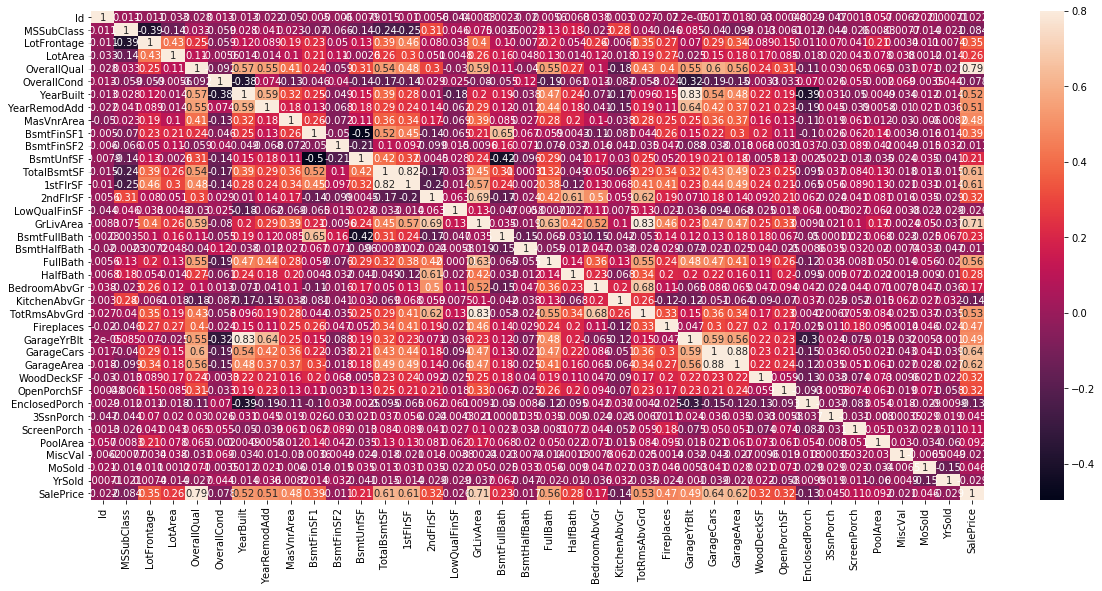

In [3]:
corrmat = home_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

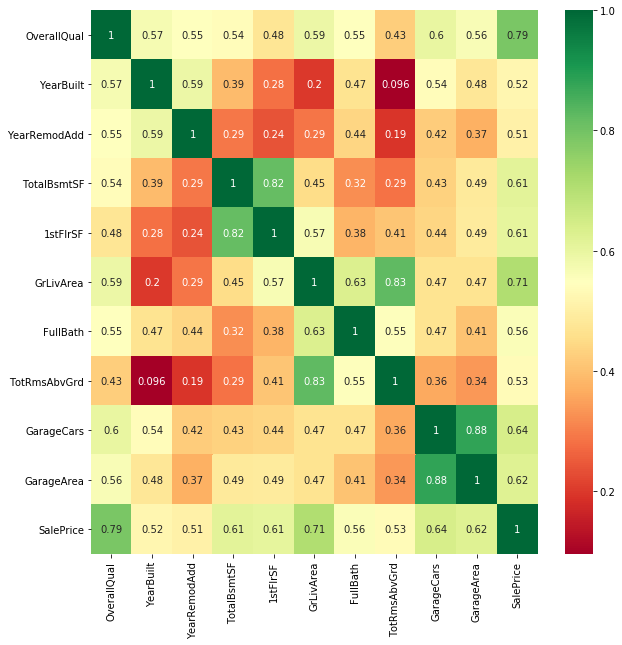

In [4]:
# most correlated features
corrmat = home_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(home_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
print("Find most important features relative to target")
corr = home_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

Step 3: Preprocessing the data and evaluating our model by carrying out train test split on training data and employing different models

In [6]:

# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd',
       'Fireplaces','WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
X = home_data[features]


# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
train_model = DecisionTreeRegressor(random_state=1)
# Fit Model
train_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = train_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
train_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
train_model.fit(train_X, train_y)
val_predictions = train_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE when not specifying max_leaf_nodes: 25,223
Validation MAE for best value of max_leaf_nodes: 24,656
Validation MAE for Random Forest Model: 17,781


In [7]:
numerical_features = home_data.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
#finding the columns with nan values in train data
train_nas = home_data[numerical_features].isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Step 4: Loading the test dataset and finding the numerical features along with the columns containing nan values so that they will be excluded from the parameters in X

In [9]:

# read test data file using pandas
test_data = pd.read_csv('test.csv')
# print("---------------------------------------------")
# categorical_features = home_data.select_dtypes(include = ["object"]).columns
# print("Categorical features : ",categorical_features)
numerical_features_test = test_data.select_dtypes(exclude = ["object"]).columns
numerical_features_test

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [10]:
#finding the columns with nan values in test data
test_nas = test_data[numerical_features_test].isnull().sum()
test_nas = test_nas[test_nas>0]
test_nas.sort_values(ascending=False)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64

Step 5: Defining the model and making the predictions on the test data

In [11]:
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [12]:

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
feature1=['MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces','WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
test_X = test_data[feature1]
 
test_preds = rf_model_on_full_data.predict(test_X)

output = pd.DataFrame({'Id': test_data.Id,'SalePrice': test_preds})
output.head()

,Id,SalePrice
0,1461,127176.50
1,1462,154292.50
2,1463,170847.78
3,1464,182657.22
4,1465,194221.68
